![nvp](../images/nvp.png)

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.insert(1, '../')
from flow_manager import *
from flow_catlog import * 
from utl import *
from load_data import *

from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from tensorflow.compat.v1 import logging
logging.set_verbosity(logging.ERROR)

In [7]:
from sklearn.datasets import make_moons

data = make_moons(3000, noise=0.05)[0].astype("float32")
norm = tfk.layers.Normalization()
norm.adapt(data)
normalized_data = norm(data)

2021-09-02 03:43:21.201758: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-09-02 03:43:21.201843: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (kangz1): /proc/driver/nvidia/version does not exist
2021-09-02 03:43:21.202646: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-02 03:43:21.256592: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [8]:
# Hyper-Parameters

flow_length = 4
lr = 1e-3
batch_size = 256
n_epochs = 300

In [11]:
input_dims = normalized_data.shape[1]
model = RealNVP(input_shape=input_dims, num_coupling_layers=flow_length)

model.compile(optimizer=tfk.optimizers.Adam(learning_rate=lr))

history = model.fit(
    normalized_data, batch_size=batch_size, epochs=n_epochs, verbose=2, validation_split=0.2
)

Epoch 1/300


2021-09-02 03:43:45.369151: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


10/10 - 3s - loss: 2.6257 - val_loss: 2.4859
Epoch 2/300
10/10 - 0s - loss: 2.4529 - val_loss: 2.3940
Epoch 3/300
10/10 - 0s - loss: 2.4017 - val_loss: 2.3643
Epoch 4/300
10/10 - 0s - loss: 2.3349 - val_loss: 2.3068
Epoch 5/300
10/10 - 0s - loss: 2.2991 - val_loss: 2.3369
Epoch 6/300
10/10 - 0s - loss: 2.2578 - val_loss: 2.2569
Epoch 7/300
10/10 - 0s - loss: 2.2048 - val_loss: 2.1984
Epoch 8/300
10/10 - 0s - loss: 2.1865 - val_loss: 2.1673
Epoch 9/300
10/10 - 0s - loss: 2.1390 - val_loss: 2.1140
Epoch 10/300
10/10 - 0s - loss: 2.0712 - val_loss: 2.1255
Epoch 11/300
10/10 - 0s - loss: 2.2059 - val_loss: 2.2385
Epoch 12/300
10/10 - 0s - loss: 2.2139 - val_loss: 2.3757
Epoch 13/300
10/10 - 0s - loss: 2.3499 - val_loss: 2.3161
Epoch 14/300
10/10 - 0s - loss: 2.2986 - val_loss: 2.1996
Epoch 15/300
10/10 - 0s - loss: 2.2170 - val_loss: 2.1817
Epoch 16/300
10/10 - 0s - loss: 2.2109 - val_loss: 2.1919
Epoch 17/300
10/10 - 0s - loss: 2.2343 - val_loss: 2.3632
Epoch 18/300
10/10 - 0s - loss: 2.2

(-2.0, 2.0)

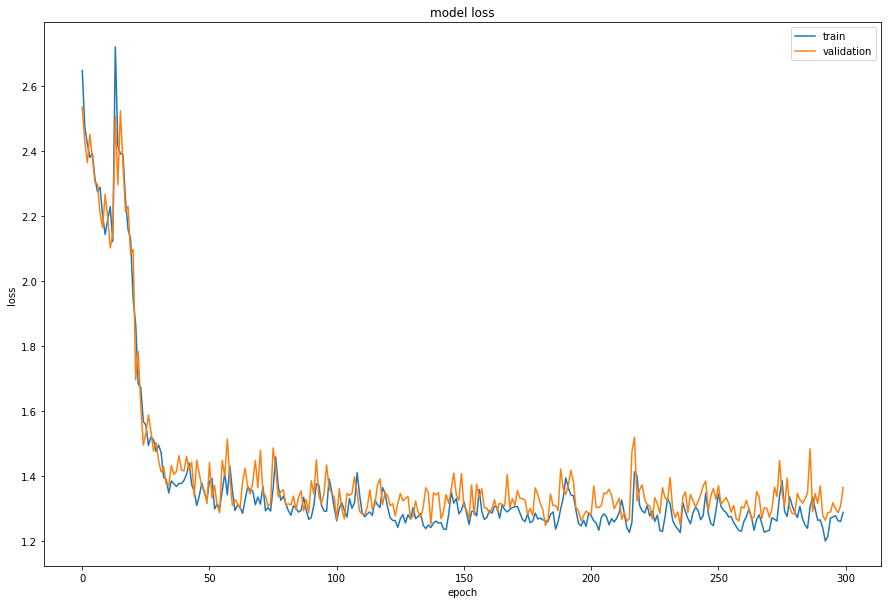

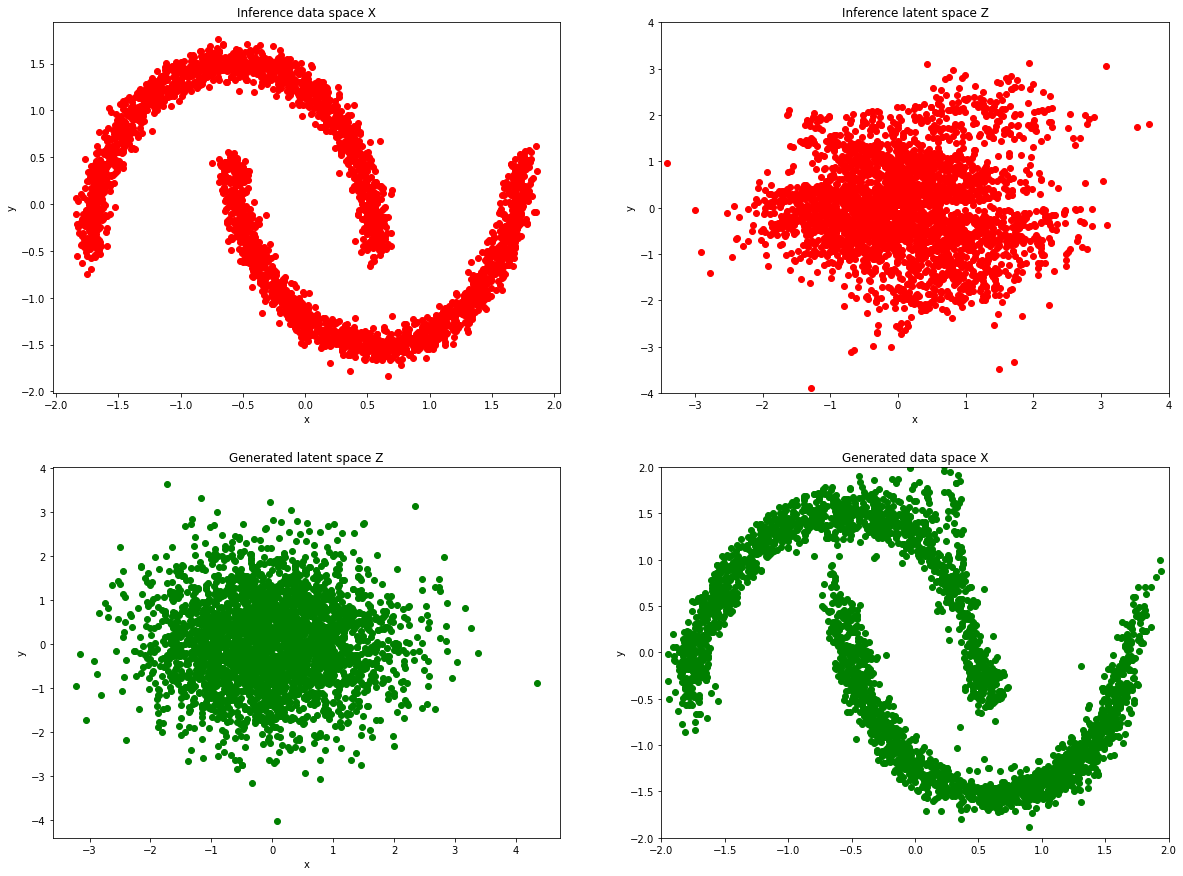

In [5]:
plt.figure(figsize=(15, 10))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.legend(["train", "validation"], loc="upper right")
plt.ylabel("loss")
plt.xlabel("epoch")

# From data to latent space.
z, _ = model(normalized_data)

# From latent space to data.
samples = model.distribution.sample(3000)
x, _ = model.predict(samples)

f, axes = plt.subplots(2, 2)
f.set_size_inches(20, 15)

axes[0, 0].scatter(normalized_data[:, 0], normalized_data[:, 1], color="r")
axes[0, 0].set(title="Inference data space X", xlabel="x", ylabel="y")
axes[0, 1].scatter(z[:, 0], z[:, 1], color="r")
axes[0, 1].set(title="Inference latent space Z", xlabel="x", ylabel="y")
axes[0, 1].set_xlim([-3.5, 4])
axes[0, 1].set_ylim([-4, 4])
axes[1, 0].scatter(samples[:, 0], samples[:, 1], color="g")
axes[1, 0].set(title="Generated latent space Z", xlabel="x", ylabel="y")
axes[1, 1].scatter(x[:, 0], x[:, 1], color="g")
axes[1, 1].set(title="Generated data space X", label="x", ylabel="y")
axes[1, 1].set_xlim([-2, 2])
axes[1, 1].set_ylim([-2, 2])